# **Lab 6: Differential equations**
**Felipe Vicencio**

# **Abstract**

This is the sixth lab of the course. Here we implement one time stepping method, specifically the explicit Euler method, for solving scalar IVPs and systems of IVPs. Then we test for accuracy and stability, and conclude that the implementation is successful.

#**About the code**

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Felipe Vicencio (fivn@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.


'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import math
import time
import matplotlib.pyplot as plt
import numpy as np

# **Introduction**

The problem of approximating the solution to an IVP (a problem of the form $u'(t) = f(u(t), t), u(0) = u_0, t \in [0, T]$, where $u(t)$ is either a scalar or a vector function) is very old.

To solve this problem, the explicit Euler method is one of the easiest to implement. Its update formula is $U_n = U_{n - 1} + k_nf(U_{n - 1}, t_{n - 1})$, where $U_n \sim u(t_n)$ and $U_0 = u(0)$.

We can also analyze the stability of an IVP by looking at its equilibrium points $u^*$ where $f(u^*, t) = 0, \forall t \in [0, T]$. 

In the scalar case we have that the linear model $f = \lambda u$ is stable around $u^* = 0$ if $Re(\lambda) < 0$, is unstable if $Re(\lambda) > 0$, and is constant or oscillates if $Re(\lambda) = 0$.

In the vector case we have that the linear model $f = Au$ is stable around $u^* = 0$ if all the eigenvalues of $A$ have negative real parts, is unstable if at least one has positive real part, and oscillates if all have zero real part.

More details about all this can be found in the lecture notes.

# **Methods**

The explicitEuler method takes a final time $T$, a function $f = f(u(t), t)$, an initial value $u0 = u(0)$, and a number of sub-intervals $n$ as input, and outputs a tuple $(u, uAtStep)$ where $u = U(t_n)$ and $uAtStep$ is a list of the $U_i$s for $i \in \{0 \ldots n\}$.

This implements the scalar and the vector case, as $f$ can be a function that outputs either a scalar or a vector, and $u0$ can be either a scalar or a vector. Examples of $U(t_n)$ for both the scalar and vector cases are printed in this code cell, although the implementation will become clearer in the *Results* section.

In [0]:
def explicitEuler(T, f, u0, n):
  k = float(T/n)
  u = u0
  uAtStep = [u]
  t = 0
  for i in range(n):
    u = u + k*f(u, t)
    uAtStep.append(u)
    t += k
  return (u, uAtStep)

# This output is correct according to Wolfram Alpha
# T = 20, f = -u(t) + 20 + 5, u0 = 10, n = 1000
print(explicitEuler(20, lambda x, y: -x + y + 5, 10, 1000)[0])

# T = 20, f = (-u_1 + t + 5, -2u_1, -2u_3 + 10), u0 = (10, 20, 40), n = 1000
print(explicitEuler(20, lambda x, y: np.array([-x[0] + y + 5, -2*x[0], -2*x[2]+ 10]), np.array([10, 20, 40]), 1000)[0])


24.000000010097494
[  24.00000001 -551.59999998    5.        ]


# **Results**

These are the accuracy and stability tests for the scalar case.

The model we use is $u'(t) = -5u(t), u(0) = u_0, t \in [0, 10]$ for $u_0 \in \{1, -10, 0, 10\}$ and $n = 10000$.

The exact solutions are:
* $u(t) = e^{-5t}$ if $u_0 = 1$,
* $u(t) = -10e^{-5t}$ if $u_0 = -10$,
* $u(t) = 0$ if $u_0 = 0$ and
* $u(t) = 10e^{-5t}$ if $u_0 = 10$.

The accuracy is verified graphically in the plots.

The stability is verified as the approximation approaches zero for all values of $u_0$ we used. Recall that this model has an unique equilibrium point at $u^* = 0$ which is stable because $-5 = \lambda < 0$.

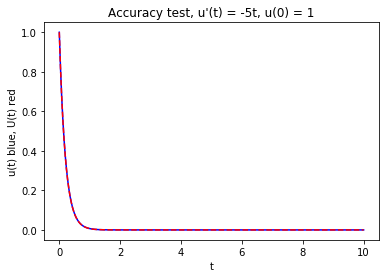

U(10) = 1.7014040303942932e-22


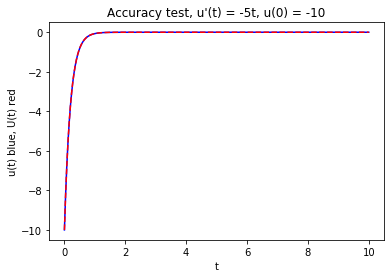

U(10) = -1.7014040303943015e-21


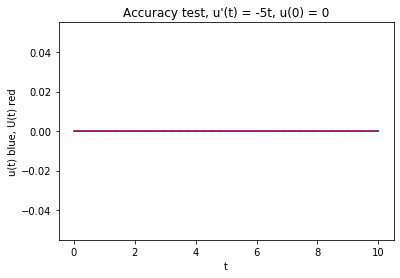

U(10) = 0.0


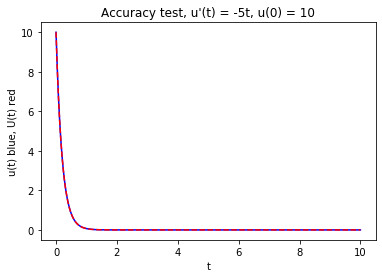

U(10) = 1.7014040303943015e-21


In [0]:
sol = explicitEuler(10, lambda x, y: -5*x, 1, 10000)
plot = plt.plot([0.001*i for i in range(10001)], [math.exp(-5*0.001*i) for i in range(10001)], 'b-')
plot = plt.plot([0.001*i for i in range(10001)], [sol[1][i] for i in range(10001)], 'r--')
plt.title('Accuracy test, u\'(t) = -5t, u(0) = 1')
plt.ylabel('u(t) blue, U(t) red')
plt.xlabel('t')
plt.show()
print("U(10) = " + str(sol[0]))

sol = explicitEuler(10, lambda x, y: -5*x, -10, 10000)
plot = plt.plot([0.001*i for i in range(10001)], [-10*math.exp(-5*0.001*i) for i in range(10001)], 'b-')
plot = plt.plot([0.001*i for i in range(10001)], [sol[1][i] for i in range(10001)], 'r--')
plt.title('Accuracy test, u\'(t) = -5t, u(0) = -10')
plt.ylabel('u(t) blue, U(t) red')
plt.xlabel('t')
plt.show()
print("U(10) = " + str(sol[0]))

sol = explicitEuler(10, lambda x, y: -5*x, 0, 10000)
plot = plt.plot([0.001*i for i in range(10001)], [0 for i in range(10001)], 'b-')
plot = plt.plot([0.001*i for i in range(10001)], [sol[1][i] for i in range(10001)], 'r--')
plt.title('Accuracy test, u\'(t) = -5t, u(0) = 0')
plt.ylabel('u(t) blue, U(t) red')
plt.xlabel('t')
plt.show()
print("U(10) = " + str(sol[0]))

sol = explicitEuler(10, lambda x, y: -5*x, 10, 10000)
plot = plt.plot([0.001*i for i in range(10001)], [10*math.exp(-5*0.001*i) for i in range(10001)], 'b-')
plot = plt.plot([0.001*i for i in range(10001)], [sol[1][i] for i in range(10001)], 'r--')
plt.title('Accuracy test, u\'(t) = -5t, u(0) = 10')
plt.ylabel('u(t) blue, U(t) red')
plt.xlabel('t')
plt.show()
print("U(10) = " + str(sol[0]))

These are the accuracy tests for the vector case.

The model we use for the accuracy and stability tests is $u'(t) = 
\left ( \begin{array}{ccc} 
-1 & 2 & 1 \\
0 & -1 & 2 \\
0 & 0 & -1
\end{array} \right )
u, u(0) = u_0, t \in [0, 10]$ for $u_0 \in \{(1, 1, 1)^T, (-10, -10, -10)^T, (0, 0, 0)^T, (10, 10, 10)^T\}$ and $n = 10000$.

For the accuracy tests we only use $u_0 = (1, 1, 1)^T$. The exact solution for this initial value is (according to Wolfram Alpha) $u(t) = (e^{-t} + 2e^{-t}t + e^{-t}t(2t+1), e^{-t} + 2e^{-t}t, e^{-t})^T$.

The accuracy is verified by counting the number of errors $\|u(t_n) - U(t_n)\|$ smaller than $10^{-3}$ only, smaller than $10^{-3}$ and $10^{-4}$ only, and $10^{-3}$, $10^{-4}$ and $10^{-5}$, and then asserting that $n = 10001$ errors were counted in total.

We conclude that our approximation is quite accurate.

In [0]:
# Accuracy tests
sol = explicitEuler(10, lambda x, y: np.array([-x[0] + 2*x[1] + x[2], -x[1] + 2*x[2], -x[2]]), np.array([1, 1, 1]), 10000)
errLessThanENeg3 = 0
errLessThanENeg4 = 0
errLessThanENeg5 = 0
for i in range(10001):
  err = np.linalg.norm(
          np.array([math.exp(-0.001*i) + 2*math.exp(-0.001*i)*0.001*i + math.exp(-0.001*i)*0.001*i*(2*0.001*i + 1),
                    math.exp(-0.001*i) + 2*math.exp(-0.001*i)*0.001*i,
                    math.exp(-0.001*i)])
          - sol[1][i]
        )
  if err < 10**(-5):
    errLessThanENeg5 += 1
  elif err < 10**(-4):
    errLessThanENeg4 += 1
  elif err < 10**(-3):
    errLessThanENeg3 += 1
print("The number of errors smaller than E-3 only is:")
print(errLessThanENeg3)
print("The number of errors smaller than E-3 and E-4 only is:")
print(errLessThanENeg4)
print("The number of errors smaller than E-3 and E-4 and E-5 is:")
print(errLessThanENeg5)
assert(errLessThanENeg3 + errLessThanENeg4 + errLessThanENeg5 == 10001)

The number of errors smaller than E-3 only is:
8222
The number of errors smaller than E-3 and E-4 only is:
1772
The number of errors smaller than E-3 and E-4 and E-5 is:
7


These are the stability tests for the vector case. We assert that the approximation approaches the zero vector for all values of $u_0$ we used in the model above. Recall that this model has an unique equilibrium point at $u^* = 0$ which is stable because all the eigenvalues of $A$ are negative real numbers ($A$ is upper triangular so its eigenvalues are in its diagonal, i. e., $\{-1, -1, -1\}$).

Here we use $T = 100$ instead of $T = 10$ to better show the convergence to the zero vector.

In [0]:
# Stability tests
assert(
  np.linalg.norm(
    explicitEuler(100, lambda x, y: np.array([-x[0] + 2*x[1] + x[2], -x[1] - 2*x[2], -x[2]]), np.array([1, 1, 1]), 10000)[0]
  ) < 10**(-6)
)
assert(
  np.linalg.norm(
    explicitEuler(100, lambda x, y: np.array([-x[0] + 2*x[1] + x[2], -x[1] - 2*x[2], -x[2]]), np.array([-10, -10, -10]), 10000)[0]
  ) < 10**(-6)
)
assert(
  np.linalg.norm(
    explicitEuler(100, lambda x, y: np.array([-x[0] + 2*x[1] + x[2], -x[1] - 2*x[2], -x[2]]), np.array([0, 0, 0]), 10000)[0]
  ) < 10**(-6)
)
assert(
  np.linalg.norm(
    explicitEuler(100, lambda x, y: np.array([-x[0] + 2*x[1] + x[2], -x[1] - 2*x[2], -x[2]]), np.array([10, 10, 10]), 10000)[0]
  ) < 10**(-6)
)

print("All tests pass!")

All tests pass!


# **Discussion**

The results were positive. I think it is very interesting to learn how to implement and test methods that solve problems as ubiquitious as IVPs.

In writing all sections of this report I collaborated with Fabián Levicán, and used the lecture notes.